## About the Data

<img src="flipflap.jpg" alt="Flip Flap Railway, Coney Island" width="600"/>

### Introduction

The dataset used in this analysis provides comprehensive information about various roller coasters from around the world. It includes attributes such as speed, height, location, manufacturer, and status (e.g., operating, removed, closed). This rich dataset allows us to explore trends, identify the characteristics of the fastest and tallest roller coasters, and analyze the contributions of different manufacturers to the roller coaster industry.


### Data Description

The dataset consists of the following key attributes:

- **Coaster Name**: The name of the roller coaster.
- **Length**: The length of the roller coaster track.
- **Speed**: The speed of the roller coaster, including both mph and km/h values.
- **Location**: The geographic location where the roller coaster is or was situated.
- **Status**: The current operational status of the roller coaster (e.g., operating, removed, closed).
- **Opening Date**: The date when the roller coaster was opened to the public.
- **Type**: The type of roller coaster (e.g., wood, steel).
- **Manufacturer**: The company that designed and built the roller coaster.
- **Height_ft**: The height restriction for riders.
- **Model**: The specific model or design of the roller coaster.
- **Inversions**: The number of inversions or loops in the roller coaster track.
- **G-Force**: The maximum g-force experienced by riders on the roller coaster.

### Initial Data Exploration

Upon initial examination, the dataset contains some irregularities and missing values that need to be addressed before conducting any detailed analysis. Some of the challenges observed include:

- Inconsistent speed measurements, such as mixed units (mph and km/h) and irregular entries (e.g., "35[1] mph (56 km/h)").
- Missing data in key columns such as speed, height, and manufacturer.
- Variations in how certain attributes are recorded, requiring standardization.

### Data Cleaning and Processing

To ensure the accuracy of our analysis, the following steps were undertaken to clean and standardize the data:

- Handling missing values by either imputing or removing incomplete entries.
- Converting speed measurements to a uniform unit (mph) to facilitate accurate comparisons.
- Correcting irregular entries in the data to maintain consistency.

### Exploratory Data Analysis (EDA)

The EDA process included visualizing key attributes, identifying trends over time, and comparing different types of roller coasters. Specific analyses included:

- Trends in roller coaster speed and height over the years.
- Differences in characteristics between wooden and steel roller coasters.
- Identifying top manufacturers based on the speed and height of their roller coasters.
- Analyzing the distribution of roller coaster statuses across various locations.

By leveraging this dataset, we aim to gain valuable insights into the evolution and current state of roller coasters worldwide, shedding light on the factors that contribute to the design and popularity of these thrilling attractions.


# Import necessary libraries

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 200)

# Load in the Data

In [35]:
df = pd.read_csv('./data/coaster_db.csv')

# Basic Data Understanding

In [36]:
df.shape

(1087, 56)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [38]:
df.head() 

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,Height,Inversions,Lift/launch system,Cost,Trains,Park section,Duration,Capacity,G-force,Designer,Max vertical angle,Drop,Soft opening date,Fast Lane available,Replaced,Track layout,Fastrack available,Soft opening date.1,Closing date,Opened,Replaced by,Website,Flash Pass Available,Must transfer from wheelchair,Theme,Single rider line available,Restraint Style,Flash Pass available,Acceleration,Restraints,Name,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,50 ft (15 m),NaN,gravity,NaN,NaN,Coney Island Cyclone Site,1:00,1600 riders per hour,2.9,LaMarcus Adna Thompson,30°,43 ft (13 m),NaN,NaN,NaN,Gravity pulled coaster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1884,40.5740,-73.9780,Wood,1884-06-16,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 1 across in ...,NaN,NaN,NaN,12,Lina Beecher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1902,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,40.5780,-73.9790,Wood,1895-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1895,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1896,41.5800,-81.5700,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,a single car. Riders are arranged 2 across in ...,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,Switchback Railway,NaN,NaN,NaN,1910,NaN,Giant Racer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,40.5745,-73.9780,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Edward A. Green,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1901,39.3538,-74.4342,Steel,1901-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [39]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Inversions,932.0,1.547210,2.114073,0.0000,0.00000,0.0000,3.0000,14.0000
year_introduced,1087.0,1994.986201,23.475248,1884.0000,1989.00000,2000.0000,2010.0000,2022.0000
latitude,812.0,38.373484,15.516596,-48.2617,35.03105,40.2898,44.7996,63.2309
longitude,812.0,-41.595373,72.285227,-123.0357,-84.55220,-76.6536,2.7781,153.4265
speed1_value,937.0,53.850374,23.385518,5.0000,40.00000,50.0000,63.0000,240.0000
speed_mph,937.0,48.617289,16.678031,5.0000,37.30000,49.7000,58.0000,149.1000
height_value,965.0,89.575171,136.246444,4.0000,44.00000,79.0000,113.0000,3937.0000
height_ft,171.0,101.996491,67.329092,13.1000,51.80000,91.2000,131.2000,377.3000
Inversions_clean,1087.0,1.326587,2.030854,0.0000,0.00000,0.0000,2.0000,14.0000
Gforce_clean,362.0,3.824006,0.989998,0.8000,3.40000,4.0000,4.5000,12.0000


# Data Preperation

## Dimensionality Reduction

Data has many redudnant columns let's subset data for unique captures of information and the most important columns.

In [40]:
df = df[['coaster_name',
#'Length', 'Speed',
'Location', 'Status',
#'Opening date',
# 'Type',
'Manufacturer',
#'Height restriction', 'Model', 'Height',
#'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#'Track layout', 'Fastrack available', 'Soft opening date.1',
#'Closing date',
#'Opened', 
#'Replaced by', 'Website',
#'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#'Single rider line available', 'Restraint Style',
#'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
'year_introduced',
'latitude', 'longitude',
'Type_Main',
'opening_date_clean',
#'speed1', 'speed2', 'speed1_value', 'speed1_unit',
'speed_mph', 
#'height_value', 'height_unit',
'height_ft',
'Inversions_clean', 'Gforce_clean']].copy()

In [41]:
df.shape

(1087, 13)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coaster_name        1087 non-null   object 
 1   Location            1087 non-null   object 
 2   Status              874 non-null    object 
 3   Manufacturer        1028 non-null   object 
 4   year_introduced     1087 non-null   int64  
 5   latitude            812 non-null    float64
 6   longitude           812 non-null    float64
 7   Type_Main           1087 non-null   object 
 8   opening_date_clean  837 non-null    object 
 9   speed_mph           937 non-null    float64
 10  height_ft           171 non-null    float64
 11  Inversions_clean    1087 non-null   int64  
 12  Gforce_clean        362 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 110.5+ KB


## Data Type conversion

```opening_data_clean``` seems to be captured as a float64, let's convert that to a datetime object.

In [43]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

## Column formatting

Columns in dataset don't look consistently formatted or easily readable.

In [44]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [45]:
df = df.rename(columns={'coaster_name':'Coaster_name',
                   'year_introduced':'Year_Introduced',
                   'latitude':'Latitude',
                   'longitude':'Longitude',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [46]:
df.columns

Index(['Coaster_name', 'Location', 'Status', 'Manufacturer', 'Year_Introduced',
       'Latitude', 'Longitude', 'Type_Main', 'Opening_Date', 'Speed_mph',
       'Height_ft', 'Inversions', 'Gforce'],
      dtype='object')

## Missing Values

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Coaster_name     1087 non-null   object        
 1   Location         1087 non-null   object        
 2   Status           874 non-null    object        
 3   Manufacturer     1028 non-null   object        
 4   Year_Introduced  1087 non-null   int64         
 5   Latitude         812 non-null    float64       
 6   Longitude        812 non-null    float64       
 7   Type_Main        1087 non-null   object        
 8   Opening_Date     837 non-null    datetime64[ns]
 9   Speed_mph        937 non-null    float64       
 10  Height_ft        171 non-null    float64       
 11  Inversions       1087 non-null   int64         
 12  Gforce           362 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(5)
memory usage: 110.5+ KB


In [48]:
df.isnull().sum()

Coaster_name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
Latitude           275
Longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

It looks like there are alot of missing values in our data. Let's impute any numerical columns with mean values, cateogrical columns with mode values, and datatime objects with linear interpolation.

In [49]:
# Mean imputation
numerical_cols = df.select_dtypes(include=['number']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Mode imputation
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Linear Interpolation
df['Opening_Date'] = df['Opening_Date'].ffill()

In [50]:
df.isnull().sum()

Coaster_name       0
Location           0
Status             0
Manufacturer       0
Year_Introduced    0
Latitude           0
Longitude          0
Type_Main          0
Opening_Date       0
Speed_mph          0
Height_ft          0
Inversions         0
Gforce             0
dtype: int64

## Duplicated Rows

In [51]:
df.loc[df.duplicated()]

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce


Noted no duplicated rows but lets take a deeper look and look at duplicated ```Coaster_name```'s.

In [52]:
df.loc[df.duplicated(subset=['Coaster_name'])]

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.861700,-79.059800,Wood,1926-01-01,60.000000,101.996491,0,4.000000
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.420000,-70.986000,Wood,1911-01-01,48.617289,101.996491,0,3.824006
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,Vekoma,1938,41.634900,-80.318000,Wood,1938-05-23,50.000000,101.996491,0,3.824006
167,Big Thunder Mountain Railroad,Other,Operating,Arrow Development (California and Florida)Dyna...,1980,38.373484,-41.595373,Steel,1979-01-01,35.000000,101.996491,0,3.824006
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.842700,-79.542300,Steel,1981-05-23,39.800000,32.800000,0,3.824006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.134300,-74.443400,Steel,1999-01-01,48.617289,101.996491,0,3.824006
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.634300,-80.316500,Steel,1950-01-01,48.617289,101.996491,0,3.824006
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.033900,-82.423100,Steel,2022-02-01,76.000000,101.996491,2,3.824006
1082,American Dreier Looping,Other,Operating,Anton Schwarzkopf,2022,38.373484,-41.595373,Steel,2022-01-01,53.000000,101.996491,3,4.700000


Let's look at the first three coaster names.

In [53]:
df[df['Coaster_name'] == 'Crystal Beach Cyclone' ]

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,101.996491,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,101.996491,0,4.0


In [54]:
df[df['Coaster_name'] == 'Derby Racer' ]

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
14,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1911,42.42,-70.986,Wood,1911-01-01,48.617289,101.996491,0,3.824006
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.42,-70.986,Wood,1911-01-01,48.617289,101.996491,0,3.824006


In [55]:
df[df['Coaster_name'] == 'Blue Streak (Conneaut Lake)' ]

,Coaster_name,Location,Status,Manufacturer,Year_Introduced,Latitude,Longitude,Type_Main,Opening_Date,Speed_mph,Height_ft,Inversions,Gforce
59,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,Vekoma,1937,41.6349,-80.318,Wood,1938-05-23,50.0,101.996491,0,3.824006
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,Vekoma,1938,41.6349,-80.318,Wood,1938-05-23,50.0,101.996491,0,3.824006


It looks like the duplicated coasters have an identical entry with a differing ```Year_Introduced```. Let's only include the first intriduction of a coaster.

In [56]:
df = df[~df.duplicated(subset=['Coaster_name'])].copy()

# Feature Understanding

## Univariate Analysis

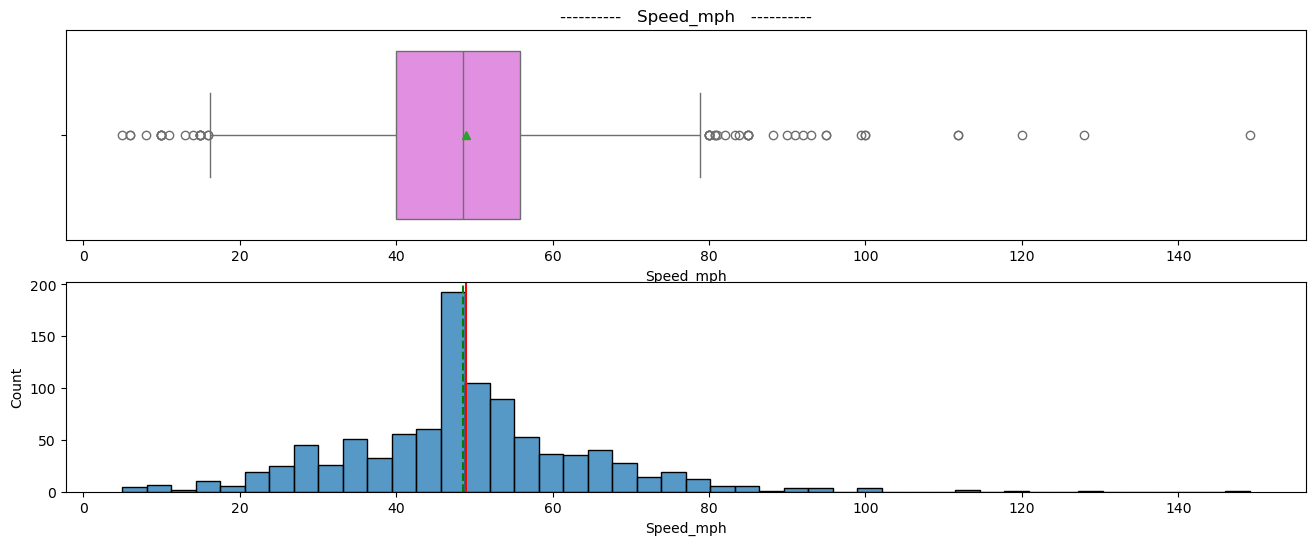

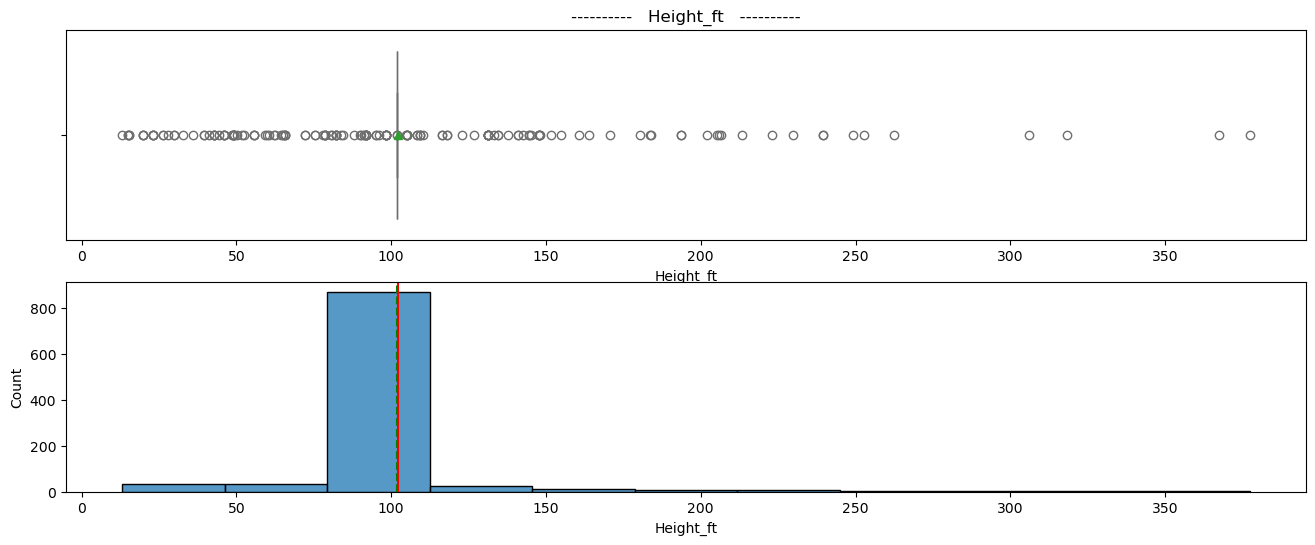

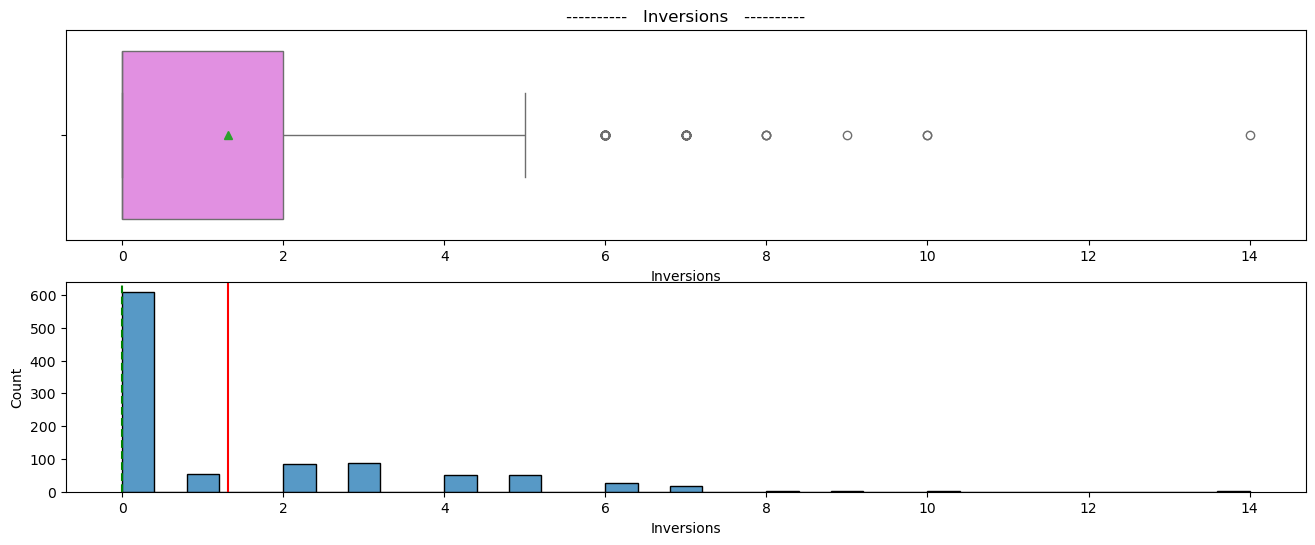

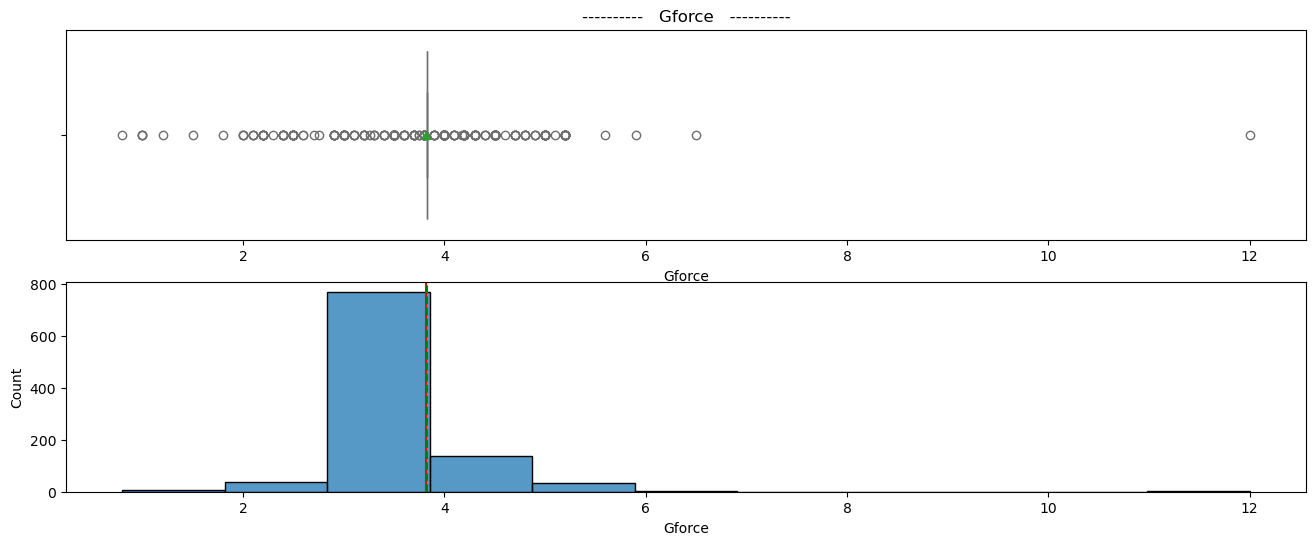

In [57]:
numerical_cols = numerical_cols.drop(['Year_Introduced','Latitude','Longitude'])

for col in numerical_cols:
    plt.figure(figsize=(16, 6))
    plt.subplot(2, 1, 1)
    plt.title("----------   " + col + "   ----------")
    sns.boxplot(data=df, x=col, showmeans=True, color="violet")
    plt.subplot(2, 1, 2)
    sns.histplot(data=df, x=col)
    plt.axvline(df[col].mean(), color="red", linestyle="-")
    plt.axvline(df[col].median(), color="green", linestyle="--")
    plt.show()

``` Speed_mph```: Seems to have a normal distribution with a few high and low outliers.

``` Height_ft```: Seems to have a right-skewed distribution with outliers on the right side.

``` Inversions```: No common distributions shown, but looks like there are clusters of certain inversion amounts.

``` Gforce```: Seems to have a left-skewed distribution with outliers on both sides with many on the low end.

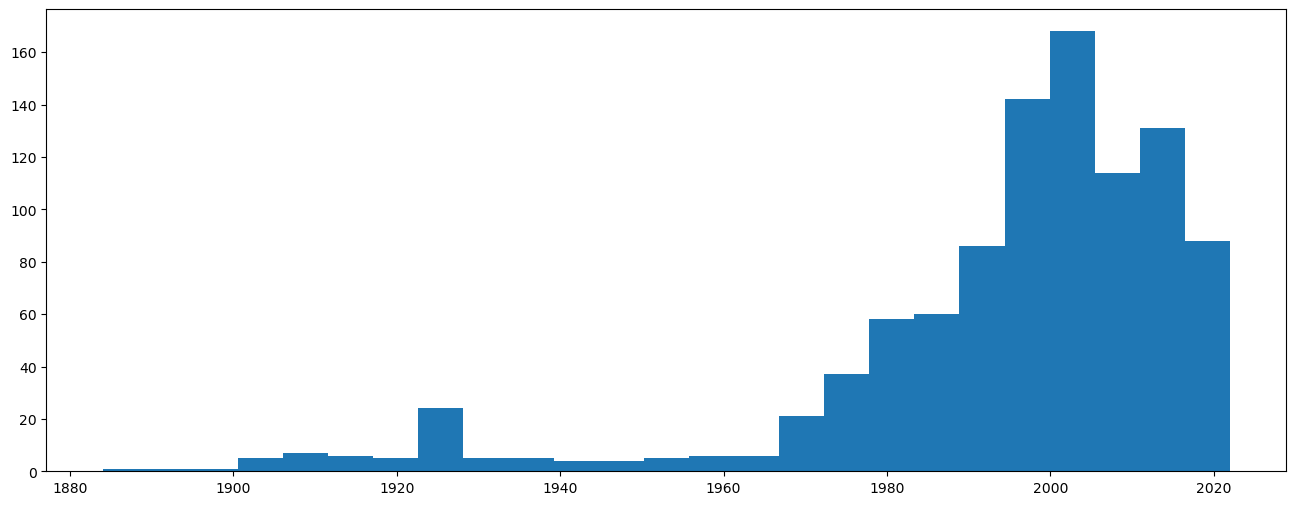

In [58]:
plt.figure(figsize=(16,6))
plt.hist(x=df['Year_Introduced'],bins=25)
plt.show()

```Year_Introduced``` has a heavily right-skewed distribution, suggesting that most roller coasters really started to be introduced around the 1970s, with the largest amount of introduction begin around the 2000s

Text(0, 0.5, 'Count')

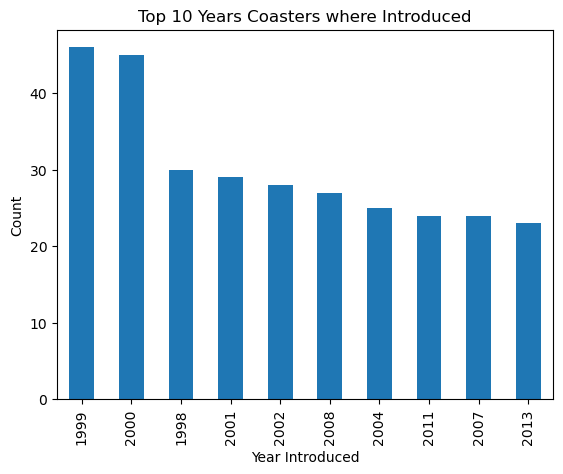

In [59]:
ax = df['Year_Introduced'].value_counts().head(10).plot(kind='bar', title='Top 10 Years Coasters where Introduced')

ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

A closer look shows that 1999 was the year with the highest introductions with year 2000 being a close second.

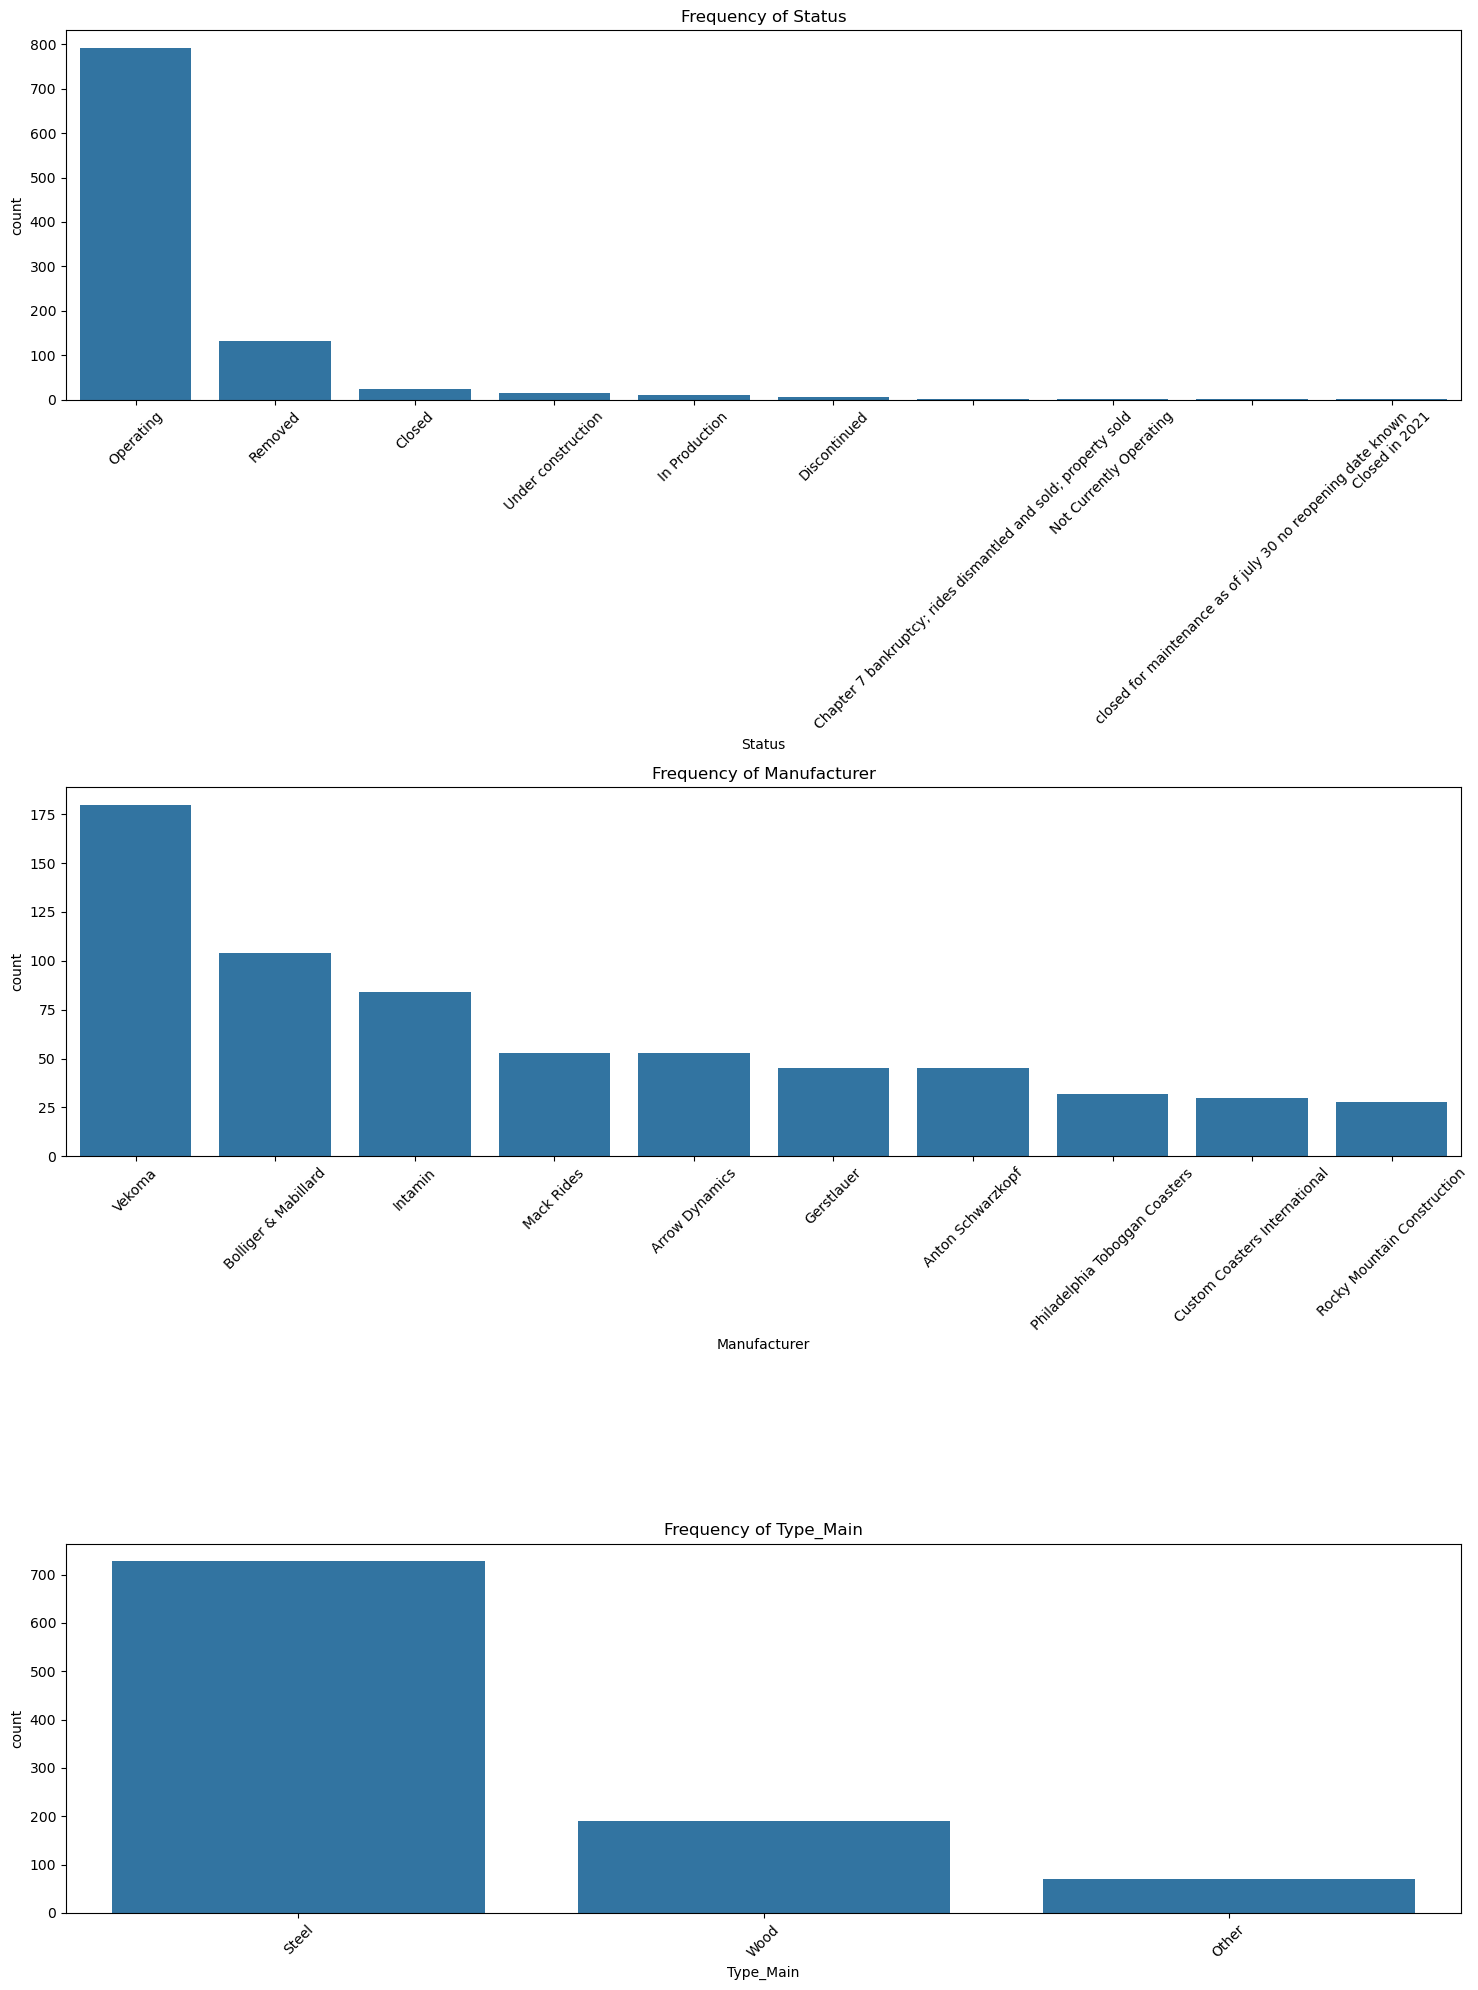

In [63]:
categorical_cols = categorical_cols.drop(['Coaster_name','Location'])

plt.figure(figsize=(15,20))
for index, col in enumerate(categorical_cols, 1):
    
    top_categories = df[col].value_counts().nlargest(10).index
    filtered_df = df[df[col].isin(top_categories)]
    
    plt.subplot(len(categorical_cols), 1, index)
    sns.countplot(data=filtered_df, x=col, order=top_categories)
    plt.title(f'Frequency of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

It looks like most roller coasters in this dataset are operating, manufactured by Vekoma, and made from steel.

## Bivariate Analysis

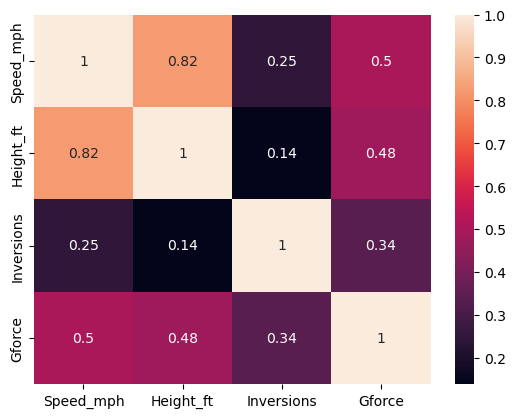

In [ ]:
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

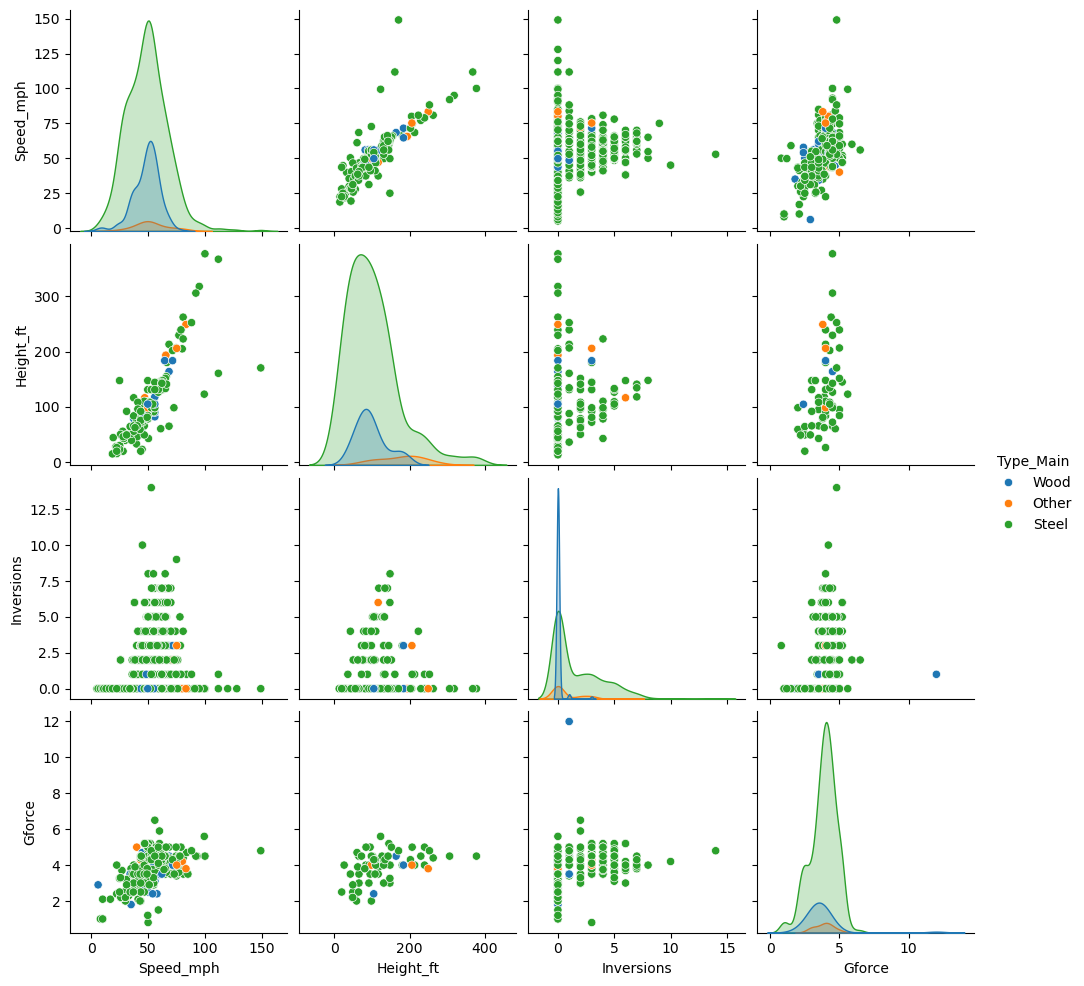

In [ ]:
sns.pairplot(data=df,
             vars=numerical_cols,
             hue='Type_Main')

plt.show()

Looking at both the correlation matrix and pariplots of the numerical columsn it seems like ```Spped_mph``` and ```Height_ft``` have a positive relationship. These graphs suggests that as ```Height_ft``` increases ```Speed_mph``` increase. This would make sense.

# Asking Questions about the data

1) What are the locations with the fastest roller coasters (minimum of 10)?

In [72]:
df.query('Location != "Other"')\
    .groupby('Location')['Speed_mph']\
    .agg(['mean','count'])\
    .query('count >= 10')\
    .sort_values('mean',ascending=False)

,mean,count
Location,,
Cedar Point,57.833333,18
Busch Gardens Williamsburg,57.509774,12
Six Flags Magic Mountain,57.241176,17
Canada's Wonderland,53.155176,13
Six Flags Great Adventure,52.089419,14
Kings Dominion,52.083333,12
Worlds of Fun,51.443458,10
Hersheypark,50.209492,16
Kings Island,49.273684,19


2) Which manufacturers have produced the fastest roller coasters?

In [79]:
df.groupby('Manufacturer')['Speed_mph']\
    .agg(['mean','count'])\
    .query('count >=15')\
    .sort_values('mean',ascending=False)

,mean,count
Manufacturer,,
Rocky Mountain Construction,61.800000,28
Bolliger & Mabillard,61.687500,104
Intamin,61.298648,84
Premier Rides,53.990476,21
Custom Coasters International,51.184486,30
Great Coasters International,50.586364,22
S&S – Sansei Technologies,49.161729,20
Arrow Dynamics,49.006313,53
Gerstlauer,46.624444,45


3) What are the locations with the tallest roller coasters?

In [87]:
df.query('Location != "Other"')\
    .groupby('Location')['Height_ft']\
    .agg(['mean','count'])\
    .query('count >= 10')\
    .sort_values('mean',ascending=False)

,mean,count
Location,,
Canada's Wonderland,115.030499,13
Blackpool Pleasure Beach,101.996491,11
Busch Gardens Williamsburg,101.996491,12
Carowinds,101.996491,14
Cedar Point,101.996491,18
Kings Dominion,101.996491,12
Kings Island,101.996491,19
Six Flags Great Adventure,101.996491,14
Six Flags Magic Mountain,101.996491,17


4) Which locations have the highest average Gforce on roller coasters?

In [89]:
df.query('Location != "Other"')\
    .groupby('Location')['Gforce']\
    .agg(['mean','count'])\
    .query('count >= 10')\
    .sort_values('mean',ascending=False)

,mean,count
Location,,
Hersheypark,4.036754,16
Canada's Wonderland,3.928005,13
Kings Dominion,3.909671,12
Busch Gardens Williamsburg,3.839003,12
Cedar Point,3.808893,18
Worlds of Fun,3.759204,10
Alton Towers,3.684309,13
Six Flags Magic Mountain,3.662826,17
Carowinds,3.617147,14


5) How does the type of roller coaster affect the number of inversions?

In [93]:
df.groupby('Type_Main')['Inversions'].mean()

Type_Main
Other    0.718310
Steel    1.695055
Wood     0.052356
Name: Inversions, dtype: float64